##SPRINT-1

1).Importing the libraries.
2).Reading the Dataset. 
3).Analyse the Data.
4).Handling the Missing Values. 
5).Water Quality Index Calculation (wqi).
6).Data Visualization. 
7).Splitting Dependent And Independent Columns
8).Splitting The Data Into Train And Test

In [1]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matlablib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install flask

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install pymc3

Note: you may need to restart the kernel to use updated packages.


In [61]:
#import the required libraries.

In [7]:
import os

import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import neighbors,datasets

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [8]:
import pandas as pd

In [9]:
import numpy as np

In [10]:
import seaborn as sns

In [11]:
import matplotlib.pyplot as plt

In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
import seaborn as sns
color = sns.color_palette()
import plotly.express          as ex
import plotly.graph_objs       as go
import plotly.offline          as pyo
import scipy.stats             as stats
import pymc3                   as pm
import theano.tensor           as tt
from matplotlib.colors import ListedColormap
from scipy.stats import norm, boxcox
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from collections import Counter
from scipy import stats
from tqdm import tqdm_notebook

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, r2_score, accuracy_score
from sklearn.model_selection import (GridSearchCV, KFold, train_test_split, cross_val_score)

from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import svm
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
# from catboost import CatBoostClassifier

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [14]:
#read the dataset
data=pd.read_csv('water_data.csv',encoding="ISO-8859-1")
data.fillna(0, inplace=True)
data.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [65]:
#Analyse the dataset

In [15]:
data.tail()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NAN,7.9,738,7.2,2.7,0.518,0.518,202,2003
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29,7.5,585,6.3,2.6,0.155,0.155,315,2003
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28,7.6,98,6.2,1.2,NAN,NAN,570,2003
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28,7.7,91,6.5,1.3,NAN,NAN,562,2003
1990,1726,"CHANDRAPUR, AGARTALA D/S OF HAORA RIVER, TRIPURA",NAN,29,7.6,110,5.7,1.1,NAN,NAN,546,2003


In [16]:
data.describe()

,year
count,1991.000000
mean,2010.038172
std,3.057333
min,2003.000000
25%,2008.000000
50%,2011.000000
75%,2013.000000
max,2014.000000


In [17]:
data.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   STATION CODE                      1991 non-null   object
 1   LOCATIONS                         1991 non-null   object
 2   STATE                             1991 non-null   object
 3   Temp                              1991 non-null   object
 4   D.O. (mg/l)                       1991 non-null   object
 5   PH                                1991 non-null   object
 6   CONDUCTIVITY (µmhos/cm)           1991 non-null   object
 7   B.O.D. (mg/l)                     1991 non-null   object
 8   NITRATENAN N+ NITRITENANN (mg/l)  1991 non-null   object
 9   FECAL COLIFORM (MPN/100ml)        1991 non-null   object
 10  TOTAL COLIFORM (MPN/100ml)Mean    1991 non-null   object
 11  year                              1991 non-null   int64 
dtypes: int64(1), object(

In [19]:
data['Temp']=pd.to_numeric(data['Temp'],errors='coerce')
data['D.O. (mg/l)']=pd.to_numeric(data['D.O. (mg/l)'],errors='coerce')
data['PH']=pd.to_numeric(data['PH'],errors='coerce')
data['B.O.D. (mg/l)']=pd.to_numeric(data['B.O.D. (mg/l)'],errors='coerce')
data['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(data['CONDUCTIVITY (µmhos/cm)'],errors='coerce')
data['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(data['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
data['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(data['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')
data.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)           object
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [63]:
data.shape

(9, 2)

In [64]:
data.isnull().any()

year    False
wqi     False
dtype: bool

In [22]:
data.isnull().sum()

STATION CODE                          0
LOCATIONS                             0
STATE                                 0
Temp                                 92
D.O. (mg/l)                          31
PH                                    8
CONDUCTIVITY (µmhos/cm)              25
B.O.D. (mg/l)                        43
NITRATENAN N+ NITRITENANN (mg/l)    225
FECAL COLIFORM (MPN/100ml)            0
TOTAL COLIFORM (MPN/100ml)Mean      132
year                                  0
dtype: int64

In [23]:
data.isnull().sum()

STATION CODE                          0
LOCATIONS                             0
STATE                                 0
Temp                                 92
D.O. (mg/l)                          31
PH                                    8
CONDUCTIVITY (µmhos/cm)              25
B.O.D. (mg/l)                        43
NITRATENAN N+ NITRITENANN (mg/l)    225
FECAL COLIFORM (MPN/100ml)            0
TOTAL COLIFORM (MPN/100ml)Mean      132
year                                  0
dtype: int64

In [24]:
data.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)           object
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [25]:
data.nunique()

STATION CODE                         321
LOCATIONS                            666
STATE                                203
Temp                                 177
D.O. (mg/l)                          165
PH                                   265
CONDUCTIVITY (µmhos/cm)             1004
B.O.D. (mg/l)                        406
NITRATENAN N+ NITRITENANN (mg/l)     505
FECAL COLIFORM (MPN/100ml)           870
TOTAL COLIFORM (MPN/100ml)Mean      1093
year                                  12
dtype: int64

In [66]:
# data visualization

<AxesSubplot:title={'center':'Missing Values Per Feature'}>

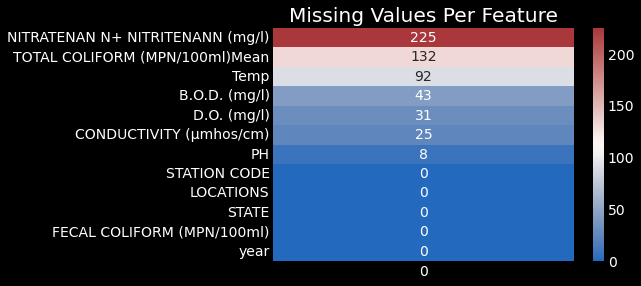

In [26]:
plt.title('Missing Values Per Feature')
nans = data.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

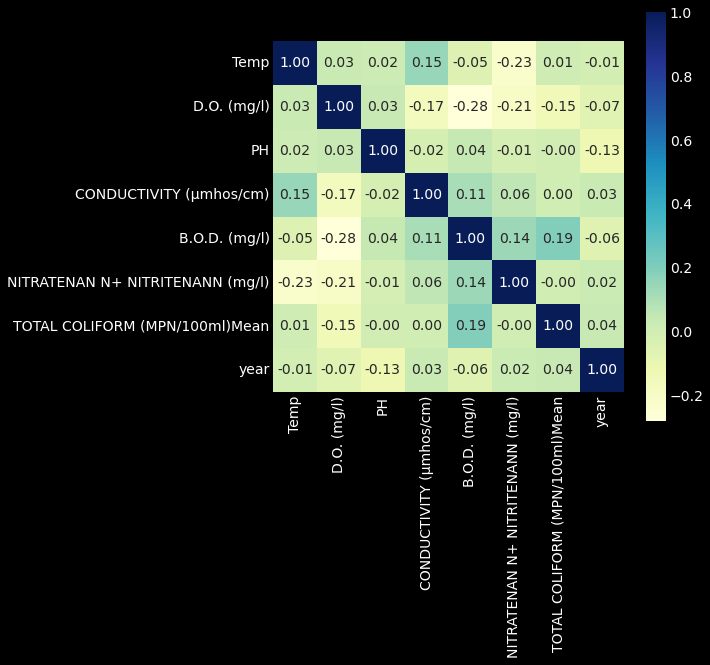

In [27]:
Corrmat = data.corr()
plt.subplots(figsize=(7,7))
sns.heatmap(Corrmat, cmap="YlGnBu", square = True, annot=True, fmt='.2f')
plt.show()

In [28]:
#initialization
start=2
end=1779
station=data.iloc [start:end ,0]
location=data.iloc [start:end ,1]
state=data.iloc [start:end ,2]
do= data.iloc [start:end ,4].astype(np.float64)
value=0
ph = data.iloc[ start:end,5]  
co = data.iloc [start:end ,6].astype(np.float64)   
  
year=data.iloc[start:end,11]
tc=data.iloc [2:end ,10].astype(np.float64)


bod = data.iloc [start:end ,7].astype(np.float64)
na= data.iloc [start:end ,8].astype(np.float64)
na.dtype


dtype('float64')

In [67]:
#wqi

In [29]:
data=pd.concat([station,location,state,do,ph,co,bod,na,tc,year],axis=1)
data. columns = ['station','location','state','do','ph','co','bod','na','tc','year']

In [30]:
#calulation of Ph
data['npH']=data.ph.apply(lambda x: (100 if (8.5>=x>=7)  
                                 else(80 if  (8.6>=x>=8.5) or (6.9>=x>=6.8) 
                                      else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7) 
                                          else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                              else 0)))))

In [31]:
#calculation of dissolved oxygen
data['ndo']=data.do.apply(lambda x:(100 if (x>=6)  
                                 else(80 if  (6>=x>=5.1) 
                                      else(60 if (5>=x>=4.1)
                                          else(40 if (4>=x>=3) 
                                              else 0)))))

In [32]:
#calculation of total coliform
data['nco']=data.tc.apply(lambda x:(100 if (5>=x>=0)  
                                 else(80 if  (50>=x>=5) 
                                      else(60 if (500>=x>=50)
                                          else(40 if (10000>=x>=500) 
                                              else 0)))))

In [33]:
#calc of B.D.O
data['nbdo']=data.bod.apply(lambda x:(100 if (3>=x>=0)  
                                 else(80 if  (6>=x>=3) 
                                      else(60 if (80>=x>=6)
                                          else(40 if (125>=x>=80) 
                                              else 0)))))

In [34]:
#calculation of electrical conductivity
data['nec']=data.co.apply(lambda x:(100 if (75>=x>=0)  
                                 else(80 if  (150>=x>=75) 
                                      else(60 if (225>=x>=150)
                                          else(40 if (300>=x>=225) 
                                              else 0)))))

In [35]:
#Calulation of nitrate
data['nna']=data.na.apply(lambda x:(100 if (20>=x>=0)  
                                 else(80 if  (50>=x>=20) 
                                      else(60 if (100>=x>=50)
                                          else(40 if (200>=x>=100) 
                                              else 0)))))

In [36]:
data['wph']=data.npH * 0.165
data['wdo']=data.ndo * 0.281
data['wbdo']=data.nbdo * 0.234
data['wec']=data.nec* 0.009
data['wna']=data.nna * 0.028
data['wco']=data.nco * 0.281
data['wqi']=data.wph+data.wdo+data.wbdo+data.wec+data.wna+data.wco 
data

,station,location,state,do,ph,co,bod,na,tc,year,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
2,1475,ZUARI AT PANCHAWADI,GOA,6.300,6.900,179.0,1.7,0.1,5330.0,2014,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,5.800,6.900,64.0,3.8,0.5,8443.0,2014,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,5.800,7.300,83.0,1.9,0.4,5500.0,2014,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,5.500,7.400,81.0,1.5,0.1,4049.0,2014,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
6,1476,"MANDOVI AT TONCA, MARCELA, GOA",GOA,6.100,6.700,308.0,1.4,0.3,5672.0,2014,...,100,0,100,9.9,28.10,23.40,0.00,2.8,11.24,75.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774,1428,"KHARKHLA NEAR SUTNGA KHLIERIAT,JAINTIA HILLS D...",NAN,4.600,3.000,350.0,6.2,2.2,49.0,2006,...,60,0,100,0.0,16.86,14.04,0.00,2.8,22.48,56.18
1775,1631,"MYNTDU RIVER JOWAI, MEGHALAYA",NAN,8.800,7.000,172.0,1.6,5.0,2800.0,2006,...,100,60,100,16.5,28.10,23.40,0.54,2.8,11.24,82.58
1776,1632,"GANOL RIVER TURA, MEGHALAYA",NAN,10.000,7.100,150.0,1.0,4.0,350.0,2006,...,100,80,100,16.5,28.10,23.40,0.72,2.8,16.86,88.38
1777,1633,"SIMSANG RIVER WILLIAMNAGAR, MEGHALAYA",NAN,9.000,7.300,158.0,1.8,7.2,280.0,2006,...,100,60,100,16.5,28.10,23.40,0.54,2.8,16.86,88.20


In [37]:
#calculation overall wqi for each year
ag=data.groupby('year')['wqi'].mean()

In [38]:
ag.head()

year
2006    71.308824
2007    72.549000
2008    72.570943
2009    74.085193
2010    74.648723
Name: wqi, dtype: float64

In [39]:
x= data.iloc[:,0:7].values
y = data.iloc[:,7:].values

In [40]:
print(x.shape)
print(y.shape)

(1777, 7)
(1777, 16)


In [41]:
data=ag.reset_index(level=0,inplace=False)
data

,year,wqi
0,2006,71.308824
1,2007,72.549000
2,2008,72.570943
3,2009,74.085193
4,2010,74.648723
5,2011,75.647013
6,2012,78.969041
7,2013,75.009425
8,2014,76.879588


C:\Users\KRISHN~1\AppData\Local\Temp/ipykernel_23732/2644049230.py:11: MatplotlibDeprecationWarning:

Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.



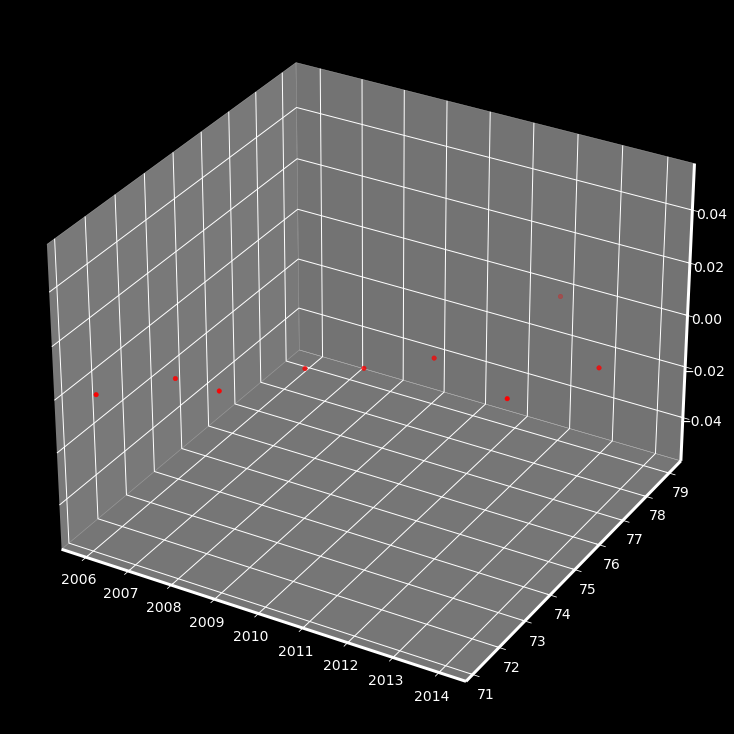

,year,wqi
0,2006,71.308824
1,2007,72.549000
2,2008,72.570943
3,2009,74.085193
4,2010,74.648723
5,2011,75.647013
6,2012,78.969041
7,2013,75.009425
8,2014,76.879588


In [42]:
#visualizing the filttered data

year=data['year'].values
AQI=data['wqi'].values
data['wqi']=pd.to_numeric(data['wqi'],errors='coerce')
data['year']=pd.to_numeric(data['year'],errors='coerce')


plt.rcParams['figure.figsize'] = (20.0, 10.0)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(year,AQI, color='red')
plt.show()
data

In [43]:
data = data[np.isfinite(data['wqi'])]
data.head()

,year,wqi
0,2006,71.308824
1,2007,72.549000
2,2008,72.570943
3,2009,74.085193
4,2010,74.648723


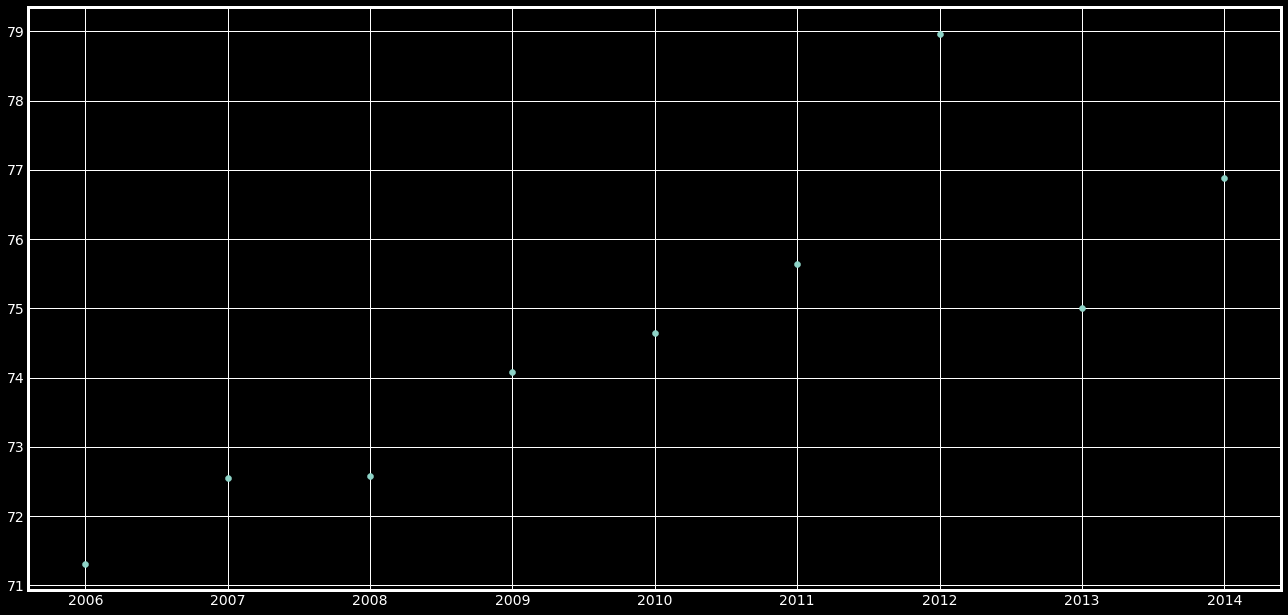

In [44]:
#scatter plot of data points
cols =['year']
y = data['wqi']
x=data[cols]

plt.scatter(x,y)
plt.show()

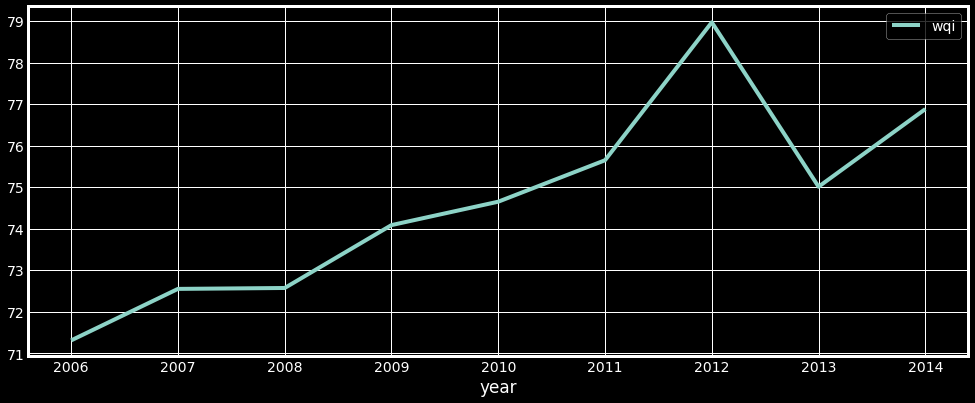

In [45]:
data=data.set_index('year')
data.plot(figsize=(15,6))
plt.show()

In [46]:
data=data.reset_index(level=0,inplace=False)
data

,year,wqi
0,2006,71.308824
1,2007,72.549000
2,2008,72.570943
3,2009,74.085193
4,2010,74.648723
5,2011,75.647013
6,2012,78.969041
7,2013,75.009425
8,2014,76.879588
